This notebook permits to practice with Pillow. It shows how to manipulate pixels and create filters. cat.jpg is available here: https://github.com/paceuniversity/AIInternshipExperience. The image needs to be added to your resources in Google Colab.



# **Section 1 - Overview**



In [8]:
from PIL import Image

In [99]:
print('PIL', Image.__version__)

PIL 11.2.1


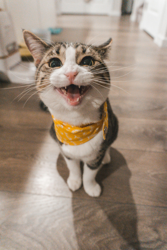

In [100]:
my_image = Image.open("cat.jpg")
my_image.thumbnail((250,250))

my_image

In [101]:
print(my_image.getbands())

('R', 'G', 'B')


In [102]:
# Print the height and width of the image
# TOCOMPLETE
print("Height", my_image.height)
print("Width", my_image.width)

Height 250
Width 167


In [103]:
# Get the RGB of a given pixel
# TOCOMPLETE - DONE
pixel = my_image.getpixel((120, 60))
print("RGB of pixel: ", pixel)
print("R :", pixel[0])
print("G :", pixel[1])
print("B :", pixel[2])

RGB of pixel:  (175, 153, 134)
R : 175
G : 153
B : 134


In [104]:
# What does this do? Add a comment
# Change the color of the pixel to grey
# TOCOMPLETE - DONE
my_image.putpixel((120,60), (120,120,120))

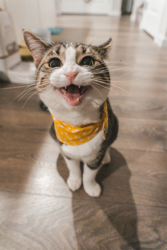

In [105]:
my_image

# Section 2 - Practice

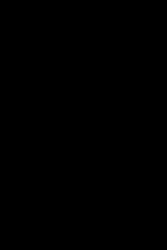

In [106]:
# Put all pixels in black
# RGB = 0,0,0

for x in range(my_image.width):
  for y in range(my_image.height):
    my_image.putpixel((x,y), (0,0,0))

my_image


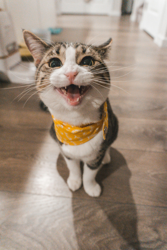

In [168]:
my_image = Image.open("cat.jpg")
my_image.thumbnail((250,250))

my_image

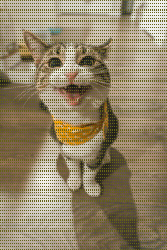

In [170]:
# Put all pixels where x and y are even in black
# RGB = 0,0,0

for x in range(my_image.width):
  for y in range(my_image.height):
    if x % 2 == 0 and y % 10 == 0:
      my_image.putpixel((x,y), (100,100,21))

my_image



In [110]:
# Pixel average
# TOCOMPLETE
def pixel_average(p):
  return int((p[0]+p[1]+p[2])/3)

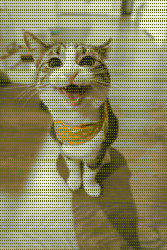

In [171]:
# Replace bright pixels by grey pixels
# TOCOMPLETE
def filtre_average(img):
  for x in range(img.width):
    for y in range(img.height):
      pixel = img.getpixel((x,y))
      m = pixel_average(pixel)
      if pixel_average(pixel) > 140:
        img.putpixel((x,y), (pixel_average(pixel),pixel_average(pixel),pixel_average(pixel) ))

filtre_average(my_image)
my_image

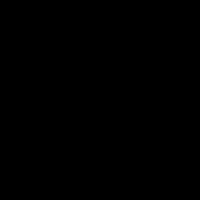

In [58]:
new_img = Image.new('RGB', (200, 200))
new_img

In [117]:
def is_border_pixel(x, y, border_size, bordered_img):
    # left border
    if x < border_size:
        return True
    # right border
    if x >= bordered_img.width - border_size:
        return True
    # top border
    if y < border_size:
        return True
    # bottom border
    if y >= bordered_img.height - border_size:
        return True
    return False

In [144]:
def add_border(original_img, border_size):
    # add twice the border size since we will have a border on both sides
    new_width = original_img.width + 2*border_size
    new_height = original_img.height + 2*border_size

    # gives us a blank image of size new_width and new_height
    bordered_img = Image.new('RGB', (new_width, new_height))

    for x in range(bordered_img.width):
        for y in range(bordered_img.height):
            if is_border_pixel(x, y, border_size, bordered_img):
                pixel = bordered_img.putpixel((x, y), (0,0,0))
            else:
                # need to figure out which pixel to copy from the original image
                orig_x = x - border_size
                orig_y = y - border_size
                orig_pixel = original_img.getpixel((orig_x, orig_y))
                bordered_img.putpixel((x, y), orig_pixel)

    return bordered_img

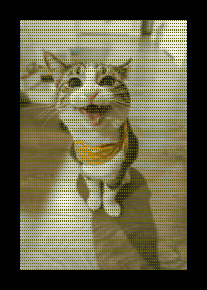

In [172]:
add_border(my_image,20)

Solution is here: https://colab.research.google.com/drive/15Hriz6T5aLe8jiw5_6FR270jWHEgKIPz?usp=sharing (not public)